In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import random
import json

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
tot_lat_range = (-90, 90)
tot_lng_range = (-180, 180)

In [2]:
# test
x = "Atlanta"
url = "http://api.openweathermap.org/data/2.5/weather?"
tryit = requests.get(url + "appid="+ api_key + "&q=" + x+"&units=imperial").json()
print(tryit)


{'coord': {'lon': -84.39, 'lat': 33.75}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 69.39, 'feels_like': 65.73, 'temp_min': 66.2, 'temp_max': 72, 'pressure': 1012, 'humidity': 60}, 'visibility': 16093, 'wind': {'speed': 9.17, 'deg': 150}, 'clouds': {'all': 75}, 'dt': 1587830733, 'sys': {'type': 1, 'id': 4155, 'country': 'US', 'sunrise': 1587812065, 'sunset': 1587860167}, 'timezone': -14400, 'id': 4180439, 'name': 'Atlanta', 'cod': 200}


In [3]:
# List for holding lat_lngs & cities by quarter

# NW
lat_lngs_q1 = []
cities_q1 = []
# NE
lat_lngs_q2 = []
cities_q2 = []
# SW
lat_lngs_q3 = []
cities_q3 = []
# SE
lat_lngs_q4 = []
cities_q4 = []

# Create a set of random lat and lng combinations
lats1 = np.random.uniform(low=00.000, high=90.000, size=400)
lngs1 = np.random.uniform(low=-180.000, high=00.000, size=400)

lats2 = np.random.uniform(low=00.000, high=90.000, size=400)
lngs2 = np.random.uniform(low=-00.000, high=180.000, size=400)

lats3 = np.random.uniform(low=-90.000, high=00.000, size=500)
lngs3 = np.random.uniform(low=-180.000, high=00.000, size=500)

lats4 = np.random.uniform(low=-90.000, high=00.000, size=400)
lngs4 = np.random.uniform(low=-0.000, high=180.000, size=400)

lat_lngs_q1 = zip(lats1, lngs1)
lat_lngs_q2 = zip(lats2, lngs2)
lat_lngs_q3 = zip(lats3, lngs3)
lat_lngs_q4 = zip(lats4, lngs4)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs_q1:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities_q1:
        cities_q1.append(city)
        
# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs_q2:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities_q2:
        cities_q2.append(city)
        
# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs_q3:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities_q3:
        cities_q3.append(city)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs_q4:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities_q4:
        cities_q4.append(city)

# Print the city count to confirm sufficient count
print("Total Cities")
print(len(cities_q1))
print(len(cities_q2))
print(len(cities_q3))
print(len(cities_q4))

Total Cities
183
278
101
125


In [5]:
total_cities = (cities_q1 + cities_q2 + cities_q3 + cities_q4)
len(total_cities)

687

In [6]:
# Build query, create loop

print("Begin to record city weather data.")
print("--- --- --- --- --- --- --- --- --- ---")

url = "http://api.openweathermap.org/data/2.5/weather?"
city_name = []
country = []
lat = []
lon = []
temp = []
humidity = []
wind_speed = []
cloudiness = []
record = 1

for city in total_cities:    
    try:
        query_url = url + "appid="+ api_key + "&q=" + city +"&units=imperial"

        # Query city
        weather_response = requests.get(query_url).json()

        # Store data 
        city_name.append(weather_response["name"])
        country.append(weather_response["sys"]["country"])
        lat.append(weather_response["coord"]["lat"])
        lon.append(weather_response["coord"]["lon"])
        temp.append(weather_response["main"]["temp"])
        humidity.append(weather_response["main"]["humidity"])
        wind_speed.append(weather_response["wind"]["speed"])
        cloudiness.append(weather_response["clouds"]["all"])
        
        # Print Query City
        print("Processing data for Record "+str(record)+": "+ city)
        
        # Add number counter
        record += 1
        
        # Slow it down for api rate
        time.sleep(.5)

    # If no data, try next city
    except:
        print("Data not found. Skipping...")

print("--- --- --- --- --- --- --- --- --- ---")
print("End.")

Begin to record city weather data.
--- --- --- --- --- --- --- --- --- ---
Processing data for Record 1: atar
Data not found. Skipping...
Processing data for Record 2: ribeira grande
Processing data for Record 3: wick
Processing data for Record 4: kapaa
Data not found. Skipping...
Processing data for Record 5: puerto escondido
Processing data for Record 6: ponta do sol
Processing data for Record 7: praia
Data not found. Skipping...
Processing data for Record 8: north bend
Processing data for Record 9: nuevo ideal
Processing data for Record 10: cockburn town
Processing data for Record 11: asfi
Processing data for Record 12: sitka
Data not found. Skipping...
Processing data for Record 13: iracoubo
Processing data for Record 14: tuktoyaktuk
Processing data for Record 15: upernavik
Processing data for Record 16: vila franca do campo
Processing data for Record 17: fairbanks
Processing data for Record 18: qaanaaq
Processing data for Record 19: makaha
Processing data for Record 20: iqaluit
Pr

Processing data for Record 186: davila
Data not found. Skipping...
Processing data for Record 187: baykit
Processing data for Record 188: beringovskiy
Processing data for Record 189: kulhudhuffushi
Processing data for Record 190: vardo
Processing data for Record 191: kholm
Processing data for Record 192: usak
Processing data for Record 193: butaritari
Processing data for Record 194: hede
Processing data for Record 195: aswan
Processing data for Record 196: turbat
Processing data for Record 197: udachnyy
Processing data for Record 198: pechenga
Processing data for Record 199: longyearbyen
Processing data for Record 200: khatanga
Processing data for Record 201: banda aceh
Data not found. Skipping...
Processing data for Record 202: ugoofaaru
Processing data for Record 203: nalut
Processing data for Record 204: freiberg
Processing data for Record 205: yakeshi
Processing data for Record 206: constantine
Processing data for Record 207: dikson
Processing data for Record 208: nemuro
Processing

Processing data for Record 371: rafraf
Processing data for Record 372: edea
Processing data for Record 373: itoman
Processing data for Record 374: kaset sombun
Data not found. Skipping...
Processing data for Record 375: pemangkat
Processing data for Record 376: lasa
Processing data for Record 377: mahibadhoo
Processing data for Record 378: nedjo
Processing data for Record 379: malkara
Processing data for Record 380: khani
Processing data for Record 381: nurobod
Processing data for Record 382: tarakan
Processing data for Record 383: vostok
Processing data for Record 384: hadejia
Processing data for Record 385: issa
Processing data for Record 386: ulagan
Processing data for Record 387: xuddur
Data not found. Skipping...
Processing data for Record 388: port blair
Processing data for Record 389: fara in sabina
Processing data for Record 390: salalah
Processing data for Record 391: arkadak
Processing data for Record 392: ayan
Processing data for Record 393: baherden
Processing data for Reco

Processing data for Record 562: bambous virieux
Processing data for Record 563: mpongwe
Processing data for Record 564: roma
Processing data for Record 565: ambon
Processing data for Record 566: mount gambier
Processing data for Record 567: samarai
Processing data for Record 568: mitsamiouli
Processing data for Record 569: port keats
Processing data for Record 570: norsup
Processing data for Record 571: ambilobe
Processing data for Record 572: mwingi
Processing data for Record 573: grand gaube
Data not found. Skipping...
Processing data for Record 574: sesheke
Processing data for Record 575: tuatapere
Processing data for Record 576: hithadhoo
Processing data for Record 577: henties bay
Processing data for Record 578: westport
Processing data for Record 579: isangel
Processing data for Record 580: saldanha
Data not found. Skipping...
Processing data for Record 581: bambanglipuro
Processing data for Record 582: tsiroanomandidy
Data not found. Skipping...
Processing data for Record 583: m

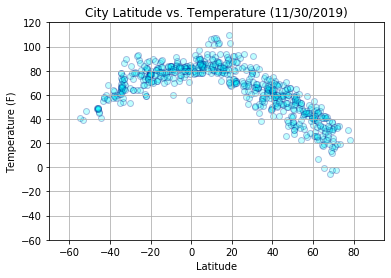

In [7]:
temp_VS_lat = pd.DataFrame({"lat":lat, "temp": temp})
plt.scatter(temp_VS_lat["lat"], temp_VS_lat["temp"], marker="o", c="aqua", edgecolors= "navy", alpha=.25)

plt.title("City Latitude vs. Temperature (11/30/2019)")
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.ylim(-60, 120)
plt.xlim(-70, 95)
plt.grid(True)
plt.savefig("./imgs/Latitude_vs_Temp.png")
plt.show()

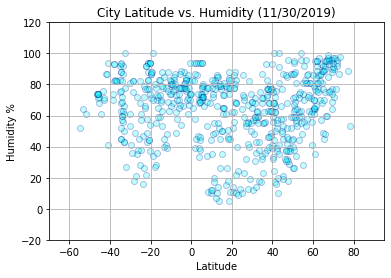

In [8]:
hum_VS_lat = pd.DataFrame({"lat":lat, "hum": humidity})
plt.scatter(hum_VS_lat["lat"], hum_VS_lat["hum"], marker="o", c="aqua", edgecolors= "navy", alpha=.25)

plt.title("City Latitude vs. Humidity (11/30/2019)")
plt.ylabel("Humidity %")
plt.xlabel("Latitude")
plt.ylim(-20, 120)
plt.xlim(-70, 95)
plt.grid(True)
plt.savefig("./imgs/Latitude_vs_Humidity.png")
plt.show()

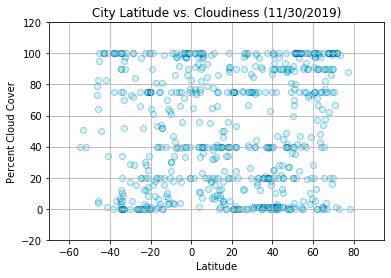

In [9]:
cloud_VS_lat = pd.DataFrame({"lat":lat, "clou": cloudiness})
plt.scatter(cloud_VS_lat["lat"], cloud_VS_lat["clou"], marker="o", c="aqua", edgecolors= "navy", alpha=.25)

plt.title("City Latitude vs. Cloudiness (11/30/2019)")
plt.ylabel("Percent Cloud Cover")
plt.xlabel("Latitude")
plt.ylim(-20, 120)
plt.xlim(-70, 95)
plt.grid(True)
plt.savefig("./imgs/Latitude_vs_Cloudiness.png")
plt.show()

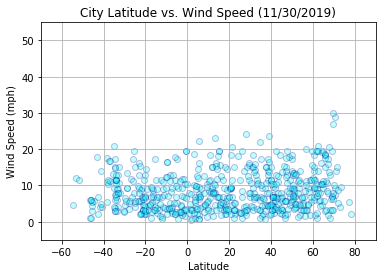

In [10]:
wind_VS_lat = pd.DataFrame({"lat":lat, "wind": wind_speed})
plt.scatter(wind_VS_lat["lat"], wind_VS_lat["wind"], marker="o", c="aqua", edgecolors= "navy", alpha=.25)

plt.title("City Latitude vs. Wind Speed (11/30/2019)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.ylim(-5, 55)
plt.xlim(-70, 90)
plt.grid(True)
plt.savefig("./imgs/Latitude_vs_Wind_Speed.png")
plt.show()

In [11]:
global_weather_conditions_df = pd.DataFrame({
    "City Name": city_name,
    "Country": country,
    "Latitude": lat,
    "Longitude": lon,
    "Temperature (F)": temp,
    "Humidity (%)": humidity,
    "Cloud Cover (%)": cloudiness,
    "Wind Speed (mph)": wind_speed
})
global_weather_conditions_df

,City Name,Country,Latitude,Longitude,Temperature (F),Humidity (%),Cloud Cover (%),Wind Speed (mph)
0,Atar,MR,20.52,-13.05,92.34,11,0,9.13
1,Ribeira Grande,PT,38.52,-28.70,64.40,68,40,17.22
2,Wick,GB,58.43,-3.08,48.20,81,3,11.41
3,Kapaa,US,22.08,-159.32,71.44,83,90,14.99
4,Puerto Escondido,MX,15.85,-97.07,80.60,65,5,3.85
...,...,...,...,...,...,...,...,...
619,Oshakati,NA,-17.78,15.68,87.80,27,18,4.70
620,Port Augusta,AU,-32.50,137.77,63.64,100,90,14.99
621,Bowen,AU,-20.02,148.23,70.57,88,75,6.93
622,Auki,SB,-8.77,160.70,81.43,76,47,3.85


In [12]:
global_weather_conditions_df.to_csv("data/global_weather_conditions_11302019.csv")